# Table of Contents
 1. Introduction to Problem Statment
 2. Understanding Folder Structure
 3. Understanding Data Set
 4. Data Preparation
 5. Method1: Pixel values as features
 6. Model1: Model building using Pixel Features
 7. Method 2: HOG Features
 8. Model2: Model building using HOG Features

# 1. Introduction to Problem Statement

Malaria is one of the deadliest diseases. It is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.


However, Malaria diagnosis involves close examination of the blood smear at 100x magnification. This is followed by a manual counting process wherein experts count the number of Red blood cells impacted by parasites. Automatic detection of Malaria from blood smear image is a scalable solution and can save a lot of hours for healthcare industry going a long way in our battle against this deadly disease. In this project, we try to identify from blood smears using deep learning to predict whether the sample is taken from an infected person.


# 2. Understanding Folder Structure
Let us try to understand the folder structure of the dataset first before we plunge in and have a look at the dataset and blood smear images.

In [ ]:
!dir 

 Volume in drive C is Windows
 Volume Serial Number is 182E-1B2C

 Directory of C:\Users\M S SUNAMDHA HARINHI\Malaria_Detection_Project

30-05-2021  15:12    <DIR>          .
30-05-2021  15:12    <DIR>          ..
30-05-2021  15:12    <DIR>          .ipynb_checkpoints
03-11-2020  12:14    <DIR>          cell_images
13-12-2020  16:52               971 M S SUNAMDHA HARINHI - Shortcut.lnk
30-05-2021  15:06         2,582,283 Malaria_Detection_SVM_HOG.ipynb
30-05-2021  15:04         2,734,243 Malaria_Detection_SVM_HOG1-Copy1.ipynb
30-05-2021  15:12         2,734,243 Malaria_Detection_SVM_HOG1-Copy2.ipynb
27-12-2020  18:26         2,731,163 Malaria_Detection_SVM_HOG1.ipynb
08-07-2019  12:25         1,033,883 train.csv
31-12-2020  21:10         2,563,015 Untitled.ipynb
               7 File(s)     14,379,801 bytes
               4 Dir(s)  26,328,813,568 bytes free


The cell images folder contains all the images of the dataset and the file train.csv contain image names belonging to dataset and their corresponding labels i.e. Parasitized/Uninfected.
Now lets see the names of images present in our dataset.

In [ ]:
!dir .\cell_images

 Volume in drive C is Windows
 Volume Serial Number is 182E-1B2C

 Directory of C:\Users\M S SUNAMDHA HARINHI\Malaria_Detection_Project\cell_images

03-11-2020  12:14    <DIR>          .
03-11-2020  12:14    <DIR>          ..
05-07-2019  17:22               174 .zip
05-07-2019  17:22            10,957 C100P61ThinF_IMG_20150918_144104_cell_128.png
05-07-2019  17:22            11,338 C100P61ThinF_IMG_20150918_144104_cell_131.png
05-07-2019  17:22             9,980 C100P61ThinF_IMG_20150918_144104_cell_144.png
05-07-2019  17:22            14,025 C100P61ThinF_IMG_20150918_144104_cell_162.png
05-07-2019  17:22            18,152 C100P61ThinF_IMG_20150918_144104_cell_163.png
05-07-2019  17:22            12,825 C100P61ThinF_IMG_20150918_144104_cell_164.png
05-07-2019  17:22            13,627 C100P61ThinF_IMG_20150918_144104_cell_165.png
05-07-2019  17:22            11,236 C100P61ThinF_IMG_20150918_144104_cell_166.png
05-07-2019  17:22            14,725 C100P61ThinF_IMG_20150918_144104_cell_167

05-07-2019  17:22            17,470 C102P63ThinF_IMG_20150918_163054_cell_169.png
05-07-2019  17:22            17,039 C102P63ThinF_IMG_20150918_163054_cell_170.png
05-07-2019  17:22            15,721 C102P63ThinF_IMG_20150918_163054_cell_25.png
05-07-2019  17:22            14,529 C102P63ThinF_IMG_20150918_163054_cell_6.png
05-07-2019  17:22            13,171 C102P63ThinF_IMG_20150918_163054_cell_71.png
05-07-2019  17:22            19,781 C102P63ThinF_IMG_20150918_163054_cell_76.png
05-07-2019  17:22            11,911 C102P63ThinF_IMG_20150918_163054_cell_83.png
05-07-2019  17:22            16,166 C102P63ThinF_IMG_20150918_163054_cell_87.png
05-07-2019  17:22            11,834 C103P64ThinF_IMG_20150918_164250_cell_121.png
05-07-2019  17:22            14,565 C103P64ThinF_IMG_20150918_164250_cell_128.png
05-07-2019  17:22            16,253 C103P64ThinF_IMG_20150918_164250_cell_15.png
05-07-2019  17:22            14,190 C103P64ThinF_IMG_20150918_164250_cell_153.png
05-07-2019  17:22       

05-07-2019  17:22            13,419 C116P77ThinF_IMG_20150930_171558_cell_97.png
05-07-2019  17:22            19,312 C116P77ThinF_IMG_20150930_171558_cell_98.png
05-07-2019  17:22            11,538 C116P77ThinF_IMG_20150930_171558_cell_99.png
05-07-2019  17:22            15,059 C116P77ThinF_IMG_20150930_171635_cell_10.png
05-07-2019  17:22            12,814 C116P77ThinF_IMG_20150930_171635_cell_100.png
05-07-2019  17:22            12,756 C116P77ThinF_IMG_20150930_171635_cell_101.png
05-07-2019  17:22            14,449 C116P77ThinF_IMG_20150930_171635_cell_102.png
05-07-2019  17:22            12,197 C116P77ThinF_IMG_20150930_171635_cell_103.png
05-07-2019  17:22            13,438 C116P77ThinF_IMG_20150930_171635_cell_104.png
05-07-2019  17:22             8,177 C116P77ThinF_IMG_20150930_171635_cell_105.png
05-07-2019  17:22            19,682 C116P77ThinF_IMG_20150930_171635_cell_106.png
05-07-2019  17:22            12,062 C116P77ThinF_IMG_20150930_171635_cell_107.png
05-07-2019  17:22   

05-07-2019  17:22             9,279 C126P87ThinF_IMG_20151004_104623_cell_43.png
05-07-2019  17:22             7,304 C126P87ThinF_IMG_20151004_104623_cell_44.png
05-07-2019  17:22             9,147 C126P87ThinF_IMG_20151004_104623_cell_75.png
05-07-2019  17:22            11,534 C126P87ThinF_IMG_20151004_104623_cell_94.png
05-07-2019  17:22            12,808 C126P87ThinF_IMG_20151004_104651_cell_1.png
05-07-2019  17:22             8,895 C126P87ThinF_IMG_20151004_104651_cell_2.png
05-07-2019  17:22            14,281 C126P87ThinF_IMG_20151004_104651_cell_3.png
05-07-2019  17:22             7,680 C126P87ThinF_IMG_20151004_104728_cell_105.png
05-07-2019  17:22             6,851 C126P87ThinF_IMG_20151004_104728_cell_122.png
05-07-2019  17:22            15,245 C126P87ThinF_IMG_20151004_104728_cell_126.png
05-07-2019  17:22            13,979 C126P87ThinF_IMG_20151004_104728_cell_127.png
05-07-2019  17:22            12,792 C126P87ThinF_IMG_20151004_104728_cell_128.png
05-07-2019  17:22         

05-07-2019  17:22            15,078 C133P94ThinF_IMG_20151004_154158_cell_121.png
05-07-2019  17:22            12,426 C133P94ThinF_IMG_20151004_154158_cell_122.png
05-07-2019  17:22             7,507 C133P94ThinF_IMG_20151004_154158_cell_123.png
05-07-2019  17:22            18,440 C133P94ThinF_IMG_20151004_154158_cell_124.png
05-07-2019  17:22            13,646 C133P94ThinF_IMG_20151004_154158_cell_125.png
05-07-2019  17:22            10,196 C133P94ThinF_IMG_20151004_154158_cell_16.png
05-07-2019  17:22             6,913 C133P94ThinF_IMG_20151004_154158_cell_40.png
05-07-2019  17:22            11,619 C133P94ThinF_IMG_20151004_154158_cell_56.png
05-07-2019  17:22             7,860 C133P94ThinF_IMG_20151004_154158_cell_6.png
05-07-2019  17:22             7,704 C133P94ThinF_IMG_20151004_154158_cell_81.png
05-07-2019  17:22             9,512 C133P94ThinF_IMG_20151004_154158_cell_90.png
05-07-2019  17:22            10,538 C133P94ThinF_IMG_20151004_154351_cell_100.png
05-07-2019  17:22      

05-07-2019  17:22            10,033 C143P104ThinF_IMG_20151005_225623_cell_112.png
05-07-2019  17:22            10,137 C143P104ThinF_IMG_20151005_225623_cell_119.png
05-07-2019  17:22            11,480 C143P104ThinF_IMG_20151005_225623_cell_12.png
05-07-2019  17:22             8,596 C143P104ThinF_IMG_20151005_225623_cell_140.png
05-07-2019  17:22             9,501 C143P104ThinF_IMG_20151005_225623_cell_145.png
05-07-2019  17:22            11,165 C143P104ThinF_IMG_20151005_225623_cell_146.png
05-07-2019  17:22             8,928 C143P104ThinF_IMG_20151005_225623_cell_15.png
05-07-2019  17:22            15,786 C143P104ThinF_IMG_20151005_225623_cell_171.png
05-07-2019  17:22             9,955 C143P104ThinF_IMG_20151005_225623_cell_172.png
05-07-2019  17:22             8,846 C143P104ThinF_IMG_20151005_225623_cell_71.png
05-07-2019  17:22            10,396 C143P104ThinF_IMG_20151005_225746_cell_115.png
05-07-2019  17:22            10,332 C143P104ThinF_IMG_20151005_225746_cell_127.png
05-07-2

In [ ]:
#Storing the base directory 
import os

base_dir = os.path.join('./cell_images')


05-07-2019  17:22            16,667 C159P120ThinF_IMG_20151115_191301_cell_234.png
05-07-2019  17:22            14,462 C159P120ThinF_IMG_20151115_191301_cell_235.png
05-07-2019  17:22            12,160 C159P120ThinF_IMG_20151115_191301_cell_236.png
05-07-2019  17:22            12,589 C159P120ThinF_IMG_20151115_191301_cell_237.png
05-07-2019  17:22            12,928 C159P120ThinF_IMG_20151115_191301_cell_34.png
05-07-2019  17:22            10,497 C159P120ThinF_IMG_20151115_191301_cell_56.png
05-07-2019  17:22             9,535 C159P120ThinF_IMG_20151115_191301_cell_57.png
05-07-2019  17:22            11,918 C159P120ThinF_IMG_20151115_191301_cell_88.png
05-07-2019  17:22            13,500 C160P121ThinF_IMG_20151116_092925_cell_127.png
05-07-2019  17:22            10,902 C160P121ThinF_IMG_20151116_092925_cell_133.png
05-07-2019  17:22            12,746 C160P121ThinF_IMG_20151116_092925_cell_134.png
05-07-2019  17:22            12,515 C160P121ThinF_IMG_20151116_092925_cell_136.png
05-07-2

05-07-2019  17:22            16,194 C170P131ThinF_IMG_20151119_120111_cell_58.png
05-07-2019  17:22            15,605 C170P131ThinF_IMG_20151119_120111_cell_89.png
05-07-2019  17:22             9,919 C170P131ThinF_IMG_20151119_120150_cell_104.png
05-07-2019  17:22            12,395 C170P131ThinF_IMG_20151119_120150_cell_121.png
05-07-2019  17:22            10,668 C170P131ThinF_IMG_20151119_120150_cell_159.png
05-07-2019  17:22             9,342 C170P131ThinF_IMG_20151119_120150_cell_165.png
05-07-2019  17:22            14,284 C170P131ThinF_IMG_20151119_120150_cell_192.png
05-07-2019  17:22            14,481 C170P131ThinF_IMG_20151119_120150_cell_201.png
05-07-2019  17:22            13,249 C170P131ThinF_IMG_20151119_120150_cell_221.png
05-07-2019  17:22            12,781 C170P131ThinF_IMG_20151119_120150_cell_222.png
05-07-2019  17:22            14,526 C170P131ThinF_IMG_20151119_120150_cell_223.png
05-07-2019  17:22            35,239 C170P131ThinF_IMG_20151119_120150_cell_49.png
05-07-2

05-07-2019  17:22            12,523 C174P135NThinF_IMG_20151127_135640_cell_128.png
05-07-2019  17:22            12,704 C174P135NThinF_IMG_20151127_135640_cell_131.png
05-07-2019  17:22            11,840 C174P135NThinF_IMG_20151127_135640_cell_166.png
05-07-2019  17:22            11,748 C174P135NThinF_IMG_20151127_135640_cell_170.png
05-07-2019  17:22            11,766 C174P135NThinF_IMG_20151127_135640_cell_177.png
05-07-2019  17:22            14,776 C174P135NThinF_IMG_20151127_135640_cell_178.png
05-07-2019  17:22            15,661 C174P135NThinF_IMG_20151127_135640_cell_179.png
05-07-2019  17:22            11,396 C174P135NThinF_IMG_20151127_135640_cell_180.png
05-07-2019  17:22            13,062 C174P135NThinF_IMG_20151127_135640_cell_181.png
05-07-2019  17:22            14,311 C174P135NThinF_IMG_20151127_135640_cell_182.png
05-07-2019  17:22            14,230 C174P135NThinF_IMG_20151127_135640_cell_183.png
05-07-2019  17:22            10,459 C174P135NThinF_IMG_20151127_135640_cell_

05-07-2019  17:22            10,052 C180P141NThinF_IMG_20151201_163751_cell_156.png
05-07-2019  17:22            12,602 C180P141NThinF_IMG_20151201_163751_cell_157.png
05-07-2019  17:22             9,572 C180P141NThinF_IMG_20151201_163751_cell_158.png
05-07-2019  17:22            10,710 C180P141NThinF_IMG_20151201_163751_cell_159.png
05-07-2019  17:22            11,196 C180P141NThinF_IMG_20151201_163751_cell_160.png
05-07-2019  17:22            12,946 C180P141NThinF_IMG_20151201_163751_cell_161.png
05-07-2019  17:22            15,519 C180P141NThinF_IMG_20151201_163751_cell_162.png
05-07-2019  17:22             9,654 C180P141NThinF_IMG_20151201_163751_cell_163.png
05-07-2019  17:22            17,419 C180P141NThinF_IMG_20151201_163751_cell_164.png
05-07-2019  17:22            13,355 C180P141NThinF_IMG_20151201_163751_cell_165.png
05-07-2019  17:22            13,483 C180P141NThinF_IMG_20151201_163751_cell_166.png
05-07-2019  17:22            16,044 C180P141NThinF_IMG_20151201_163751_cell_

05-07-2019  17:22             9,266 C181P142ThinF_IMG_20151127_160514_cell_1.png
05-07-2019  17:22             7,553 C181P142ThinF_IMG_20151127_160514_cell_106.png
05-07-2019  17:22             7,937 C181P142ThinF_IMG_20151127_160514_cell_112.png
05-07-2019  17:22             9,915 C181P142ThinF_IMG_20151127_160514_cell_114.png
05-07-2019  17:22             7,858 C181P142ThinF_IMG_20151127_160514_cell_13.png
05-07-2019  17:22             7,030 C181P142ThinF_IMG_20151127_160514_cell_157.png
05-07-2019  17:22             9,000 C181P142ThinF_IMG_20151127_160514_cell_163.png
05-07-2019  17:22            10,764 C181P142ThinF_IMG_20151127_160514_cell_164.png
05-07-2019  17:22             9,094 C181P142ThinF_IMG_20151127_160514_cell_165.png
05-07-2019  17:22             7,009 C181P142ThinF_IMG_20151127_160514_cell_166.png
05-07-2019  17:22            11,501 C181P142ThinF_IMG_20151127_160514_cell_167.png
05-07-2019  17:22            13,545 C181P142ThinF_IMG_20151127_160514_cell_168.png
05-07-2

05-07-2019  17:22            15,819 C184P145ThinF_IMG_20151203_103114_cell_174.png
05-07-2019  17:22            13,888 C184P145ThinF_IMG_20151203_103114_cell_175.png
05-07-2019  17:22            15,904 C184P145ThinF_IMG_20151203_103114_cell_176.png
05-07-2019  17:22            17,361 C184P145ThinF_IMG_20151203_103114_cell_177.png
05-07-2019  17:22            16,321 C184P145ThinF_IMG_20151203_103114_cell_178.png
05-07-2019  17:22            18,310 C184P145ThinF_IMG_20151203_103114_cell_179.png
05-07-2019  17:22            16,749 C184P145ThinF_IMG_20151203_103114_cell_180.png
05-07-2019  17:22            20,621 C184P145ThinF_IMG_20151203_103114_cell_181.png
05-07-2019  17:22            16,991 C184P145ThinF_IMG_20151203_103114_cell_182.png
05-07-2019  17:22            13,721 C184P145ThinF_IMG_20151203_103114_cell_183.png
05-07-2019  17:22            11,973 C184P145ThinF_IMG_20151203_103114_cell_184.png
05-07-2019  17:22            14,371 C184P145ThinF_IMG_20151203_103114_cell_27.png
05-07

05-07-2019  17:22            12,729 C188P149ThinF_IMG_20151203_134209_cell_200.png
05-07-2019  17:22            10,819 C188P149ThinF_IMG_20151203_134209_cell_201.png
05-07-2019  17:22            10,559 C188P149ThinF_IMG_20151203_134209_cell_202.png
05-07-2019  17:22            11,322 C188P149ThinF_IMG_20151203_134209_cell_203.png
05-07-2019  17:22            12,514 C188P149ThinF_IMG_20151203_134209_cell_204.png
05-07-2019  17:22            11,128 C188P149ThinF_IMG_20151203_134209_cell_205.png
05-07-2019  17:22            13,020 C188P149ThinF_IMG_20151203_134209_cell_206.png
05-07-2019  17:22             9,919 C188P149ThinF_IMG_20151203_134209_cell_39.png
05-07-2019  17:22            12,120 C188P149ThinF_IMG_20151203_134209_cell_43.png
05-07-2019  17:22            10,510 C188P149ThinF_IMG_20151203_134209_cell_73.png
05-07-2019  17:22            11,270 C188P149ThinF_IMG_20151203_134209_cell_83.png
05-07-2019  17:22            10,466 C188P149ThinF_IMG_20151203_134209_cell_9.png
05-07-2019

05-07-2019  17:22            10,414 C208ThinF_IMG_20151029_155411_cell_46.png
05-07-2019  17:22            11,897 C208ThinF_IMG_20151029_155411_cell_7.png
05-07-2019  17:22            13,589 C208ThinF_IMG_20151029_155411_cell_8.png
05-07-2019  17:22            12,749 C208ThinF_IMG_20151029_155411_cell_87.png
05-07-2019  17:22            12,169 C208ThinF_IMG_20151029_155436_cell_111.png
05-07-2019  17:22             6,637 C208ThinF_IMG_20151029_155436_cell_125.png
05-07-2019  17:22            10,397 C208ThinF_IMG_20151029_155436_cell_127.png
05-07-2019  17:22            12,425 C208ThinF_IMG_20151029_155436_cell_143.png
05-07-2019  17:22            16,538 C208ThinF_IMG_20151029_155436_cell_187.png
05-07-2019  17:22            10,618 C208ThinF_IMG_20151029_155436_cell_200.png
05-07-2019  17:22            11,716 C208ThinF_IMG_20151029_155436_cell_27.png
05-07-2019  17:22            19,175 C208ThinF_IMG_20151029_155436_cell_35.png
05-07-2019  17:22            10,347 C208ThinF_IMG_20151029_1

05-07-2019  17:22            13,180 C216ThinF_IMG_20151106_134733_cell_218.png
05-07-2019  17:22            13,061 C216ThinF_IMG_20151106_134733_cell_220.png
05-07-2019  17:22            13,250 C216ThinF_IMG_20151106_134733_cell_236.png
05-07-2019  17:22            12,969 C216ThinF_IMG_20151106_134733_cell_52.png
05-07-2019  17:22            12,110 C216ThinF_IMG_20151106_134733_cell_56.png
05-07-2019  17:22            12,039 C216ThinF_IMG_20151106_134733_cell_65.png
05-07-2019  17:22            15,230 C216ThinF_IMG_20151106_134733_cell_87.png
05-07-2019  17:22            11,479 C216ThinF_IMG_20151106_134931_cell_117.png
05-07-2019  17:22            11,811 C216ThinF_IMG_20151106_134931_cell_14.png
05-07-2019  17:22            12,384 C216ThinF_IMG_20151106_134931_cell_140.png
05-07-2019  17:22            11,133 C216ThinF_IMG_20151106_134931_cell_18.png
05-07-2019  17:22            11,183 C216ThinF_IMG_20151106_134931_cell_28.png
05-07-2019  17:22            14,120 C216ThinF_IMG_20151106_

05-07-2019  17:22            10,990 C233ThinF_IMG_20151112_160059_cell_265.png
05-07-2019  17:22            10,426 C233ThinF_IMG_20151112_160059_cell_27.png
05-07-2019  17:22            11,018 C233ThinF_IMG_20151112_160059_cell_34.png
05-07-2019  17:22            12,730 C233ThinF_IMG_20151112_160059_cell_40.png
05-07-2019  17:22            13,493 C233ThinF_IMG_20151112_160059_cell_44.png
05-07-2019  17:22            10,744 C233ThinF_IMG_20151112_160059_cell_68.png
05-07-2019  17:22            10,942 C233ThinF_IMG_20151112_160059_cell_91.png
05-07-2019  17:22            10,436 C233ThinF_IMG_20151112_160129_cell_104.png
05-07-2019  17:22            10,794 C233ThinF_IMG_20151112_160129_cell_162.png
05-07-2019  17:22             8,807 C233ThinF_IMG_20151112_160129_cell_187.png
05-07-2019  17:22            12,415 C233ThinF_IMG_20151112_160129_cell_196.png
05-07-2019  17:22            11,725 C233ThinF_IMG_20151112_160129_cell_216.png
05-07-2019  17:22            12,625 C233ThinF_IMG_20151112

05-07-2019  17:22             9,847 C238NThinF_IMG_20151207_115017_cell_148.png
05-07-2019  17:22             9,009 C238NThinF_IMG_20151207_115017_cell_172.png
05-07-2019  17:22             7,235 C238NThinF_IMG_20151207_115017_cell_184.png
05-07-2019  17:22            13,288 C238NThinF_IMG_20151207_115017_cell_187.png
05-07-2019  17:22            10,308 C238NThinF_IMG_20151207_115017_cell_188.png
05-07-2019  17:22            12,851 C238NThinF_IMG_20151207_115017_cell_191.png
05-07-2019  17:22            14,249 C238NThinF_IMG_20151207_115017_cell_25.png
05-07-2019  17:22            10,867 C238NThinF_IMG_20151207_115017_cell_41.png
05-07-2019  17:22             3,489 C238NThinF_IMG_20151207_115017_cell_95.png
05-07-2019  17:22             9,078 C239ThinF_IMG_20151127_113008_cell_1.png
05-07-2019  17:22            13,230 C239ThinF_IMG_20151127_113008_cell_127.png
05-07-2019  17:22            14,793 C239ThinF_IMG_20151127_113008_cell_146.png
05-07-2019  17:22            13,325 C239ThinF_IM

05-07-2019  17:22             5,964 C39P4thinF_original_IMG_20150622_111206_cell_92.png
05-07-2019  17:22            12,371 C39P4thinF_original_IMG_20150622_111206_cell_93.png
05-07-2019  17:22             9,728 C39P4thinF_original_IMG_20150622_111206_cell_94.png
05-07-2019  17:22            10,841 C39P4thinF_original_IMG_20150622_111206_cell_95.png
05-07-2019  17:22             9,195 C39P4thinF_original_IMG_20150622_111206_cell_96.png
05-07-2019  17:22            12,175 C39P4thinF_original_IMG_20150622_111206_cell_97.png
05-07-2019  17:22            10,218 C39P4thinF_original_IMG_20150622_111206_cell_98.png
05-07-2019  17:22            11,547 C39P4thinF_original_IMG_20150622_111206_cell_99.png
05-07-2019  17:22             6,900 C39P4thinF_original_IMG_20150622_111326_cell_1.png
05-07-2019  17:22            12,079 C39P4thinF_original_IMG_20150622_111326_cell_10.png
05-07-2019  17:22             8,965 C39P4thinF_original_IMG_20150622_111326_cell_11.png
05-07-2019  17:22            10,6

05-07-2019  17:22            11,985 C45P6ThinF_IMG_20151130_160409_cell_192.png
05-07-2019  17:22            11,280 C45P6ThinF_IMG_20151130_160409_cell_193.png
05-07-2019  17:22            13,374 C45P6ThinF_IMG_20151130_160409_cell_194.png
05-07-2019  17:22            13,809 C45P6ThinF_IMG_20151130_160409_cell_195.png
05-07-2019  17:22            13,013 C45P6ThinF_IMG_20151130_160409_cell_196.png
05-07-2019  17:22            12,125 C45P6ThinF_IMG_20151130_160409_cell_197.png
05-07-2019  17:22            13,179 C45P6ThinF_IMG_20151130_160409_cell_198.png
05-07-2019  17:22            10,461 C45P6ThinF_IMG_20151130_160409_cell_199.png
05-07-2019  17:22            11,991 C45P6ThinF_IMG_20151130_160409_cell_200.png
05-07-2019  17:22            12,350 C45P6ThinF_IMG_20151130_160409_cell_201.png
05-07-2019  17:22            10,212 C45P6ThinF_IMG_20151130_160409_cell_37.png
05-07-2019  17:22            11,045 C45P6ThinF_IMG_20151130_160409_cell_45.png
05-07-2019  17:22            10,620 C45P6T

05-07-2019  17:22            10,691 C54P15thinF_IMG_20150728_113006_cell_197.png
05-07-2019  17:22            12,770 C54P15thinF_IMG_20150728_113006_cell_23.png
05-07-2019  17:22            11,343 C54P15thinF_IMG_20150728_113006_cell_230.png
05-07-2019  17:22            11,681 C54P15thinF_IMG_20150728_113006_cell_248.png
05-07-2019  17:22             6,990 C54P15thinF_IMG_20150728_113006_cell_49.png
05-07-2019  17:22            10,390 C54P15thinF_IMG_20150728_113006_cell_55.png
05-07-2019  17:22            10,998 C54P15thinF_IMG_20150728_113006_cell_95.png
05-07-2019  17:22             6,120 C55P16thinF_IMG_20150728_121151_cell_114.png
05-07-2019  17:22             7,761 C55P16thinF_IMG_20150728_121151_cell_115.png
05-07-2019  17:22            10,523 C55P16thinF_IMG_20150728_121151_cell_13.png
05-07-2019  17:22            10,844 C55P16thinF_IMG_20150728_121151_cell_15.png
05-07-2019  17:22            13,087 C55P16thinF_IMG_20150728_121151_cell_16.png
05-07-2019  17:22             7,054

05-07-2019  17:22            13,920 C59P20thinF_IMG_20150803_111333_cell_167.png
05-07-2019  17:22            17,737 C59P20thinF_IMG_20150803_111333_cell_168.png
05-07-2019  17:22            21,372 C59P20thinF_IMG_20150803_111333_cell_169.png
05-07-2019  17:22            20,176 C59P20thinF_IMG_20150803_111333_cell_170.png
05-07-2019  17:22            18,661 C59P20thinF_IMG_20150803_111333_cell_171.png
05-07-2019  17:22            15,489 C59P20thinF_IMG_20150803_111333_cell_172.png
05-07-2019  17:22            18,470 C59P20thinF_IMG_20150803_111333_cell_173.png
05-07-2019  17:22            17,003 C59P20thinF_IMG_20150803_111333_cell_174.png
05-07-2019  17:22            15,580 C59P20thinF_IMG_20150803_111333_cell_175.png
05-07-2019  17:22            16,530 C59P20thinF_IMG_20150803_111333_cell_176.png
05-07-2019  17:22            16,391 C59P20thinF_IMG_20150803_111333_cell_177.png
05-07-2019  17:22            15,708 C59P20thinF_IMG_20150803_111333_cell_178.png
05-07-2019  17:22           

05-07-2019  17:22            11,792 C66P27N_ThinF_IMG_20150818_164008_cell_158.png
05-07-2019  17:22             9,001 C66P27N_ThinF_IMG_20150818_164008_cell_159.png
05-07-2019  17:22            12,452 C66P27N_ThinF_IMG_20150818_164008_cell_160.png
05-07-2019  17:22             8,998 C66P27N_ThinF_IMG_20150818_164008_cell_161.png
05-07-2019  17:22            11,232 C66P27N_ThinF_IMG_20150818_164008_cell_162.png
05-07-2019  17:22             8,782 C66P27N_ThinF_IMG_20150818_164008_cell_30.png
05-07-2019  17:22             9,758 C66P27N_ThinF_IMG_20150818_164008_cell_37.png
05-07-2019  17:22             7,048 C66P27N_ThinF_IMG_20150818_164008_cell_5.png
05-07-2019  17:22             9,193 C66P27N_ThinF_IMG_20150818_164008_cell_54.png
05-07-2019  17:22             7,450 C66P27N_ThinF_IMG_20150818_164008_cell_58.png
05-07-2019  17:22             8,833 C66P27N_ThinF_IMG_20150818_164008_cell_88.png
05-07-2019  17:22            10,060 C66P27N_ThinF_IMG_20150818_164008_cell_99.png
05-07-2019  

05-07-2019  17:22             8,956 C67P28N_ThinF_IMG_20150819_125901_cell_78.png
05-07-2019  17:22             5,276 C67P28N_ThinF_IMG_20150819_132441_cell_10.png
05-07-2019  17:22             9,698 C67P28N_ThinF_IMG_20150819_132441_cell_114.png
05-07-2019  17:22             7,115 C67P28N_ThinF_IMG_20150819_132441_cell_117.png
05-07-2019  17:22            10,794 C67P28N_ThinF_IMG_20150819_132441_cell_123.png
05-07-2019  17:22            13,436 C67P28N_ThinF_IMG_20150819_132441_cell_136.png
05-07-2019  17:22             9,052 C67P28N_ThinF_IMG_20150819_132441_cell_150.png
05-07-2019  17:22             8,927 C67P28N_ThinF_IMG_20150819_132441_cell_163.png
05-07-2019  17:22            13,894 C67P28N_ThinF_IMG_20150819_132441_cell_164.png
05-07-2019  17:22             8,042 C67P28N_ThinF_IMG_20150819_132441_cell_165.png
05-07-2019  17:22            10,379 C67P28N_ThinF_IMG_20150819_132441_cell_166.png
05-07-2019  17:22             6,946 C67P28N_ThinF_IMG_20150819_132441_cell_167.png
05-07-

05-07-2019  17:22            11,795 C78P39ThinF_IMG_20150606_103413_cell_116.png
05-07-2019  17:22             9,130 C78P39ThinF_IMG_20150606_103413_cell_12.png
05-07-2019  17:22            12,226 C78P39ThinF_IMG_20150606_103413_cell_139.png
05-07-2019  17:22             8,399 C78P39ThinF_IMG_20150606_103413_cell_141.png
05-07-2019  17:22             7,405 C78P39ThinF_IMG_20150606_103413_cell_157.png
05-07-2019  17:22            10,727 C78P39ThinF_IMG_20150606_103413_cell_165.png
05-07-2019  17:22            10,697 C78P39ThinF_IMG_20150606_103413_cell_166.png
05-07-2019  17:22             5,866 C78P39ThinF_IMG_20150606_103413_cell_167.png
05-07-2019  17:22            10,563 C78P39ThinF_IMG_20150606_103413_cell_168.png
05-07-2019  17:22            11,066 C78P39ThinF_IMG_20150606_103413_cell_169.png
05-07-2019  17:22            12,805 C78P39ThinF_IMG_20150606_103413_cell_170.png
05-07-2019  17:22            12,769 C78P39ThinF_IMG_20150606_103413_cell_171.png
05-07-2019  17:22            

05-07-2019  17:22            11,636 C80P41ThinF_IMG_20150817_110348_cell_129.png
05-07-2019  17:22            15,319 C80P41ThinF_IMG_20150817_110348_cell_30.png
05-07-2019  17:22            10,444 C80P41ThinF_IMG_20150817_110348_cell_37.png
05-07-2019  17:22             7,189 C80P41ThinF_IMG_20150817_110348_cell_4.png
05-07-2019  17:22            10,102 C80P41ThinF_IMG_20150817_110348_cell_42.png
05-07-2019  17:22             9,982 C80P41ThinF_IMG_20150817_110348_cell_59.png
05-07-2019  17:22             9,688 C80P41ThinF_IMG_20150817_110348_cell_66.png
05-07-2019  17:22            11,193 C80P41ThinF_IMG_20150817_110348_cell_85.png
05-07-2019  17:22            10,866 C80P41ThinF_IMG_20150817_110348_cell_88.png
05-07-2019  17:22            12,783 C80P41ThinF_IMG_20150817_110608_cell_1.png
05-07-2019  17:22            10,304 C80P41ThinF_IMG_20150817_110608_cell_108.png
05-07-2019  17:22            13,598 C80P41ThinF_IMG_20150817_110608_cell_120.png
05-07-2019  17:22            11,895 C80

05-07-2019  17:22            23,663 C89P50ThinF_IMG_20150820_163728_cell_200.png
05-07-2019  17:22            13,961 C89P50ThinF_IMG_20150820_163728_cell_201.png
05-07-2019  17:22            18,563 C89P50ThinF_IMG_20150820_163728_cell_202.png
05-07-2019  17:22            14,846 C89P50ThinF_IMG_20150820_163728_cell_44.png
05-07-2019  17:22            11,882 C89P50ThinF_IMG_20150820_163728_cell_47.png
05-07-2019  17:22             9,633 C89P50ThinF_IMG_20150820_163728_cell_5.png
05-07-2019  17:22            13,125 C89P50ThinF_IMG_20150820_163728_cell_78.png
05-07-2019  17:22             9,819 C89P50ThinF_IMG_20150820_163728_cell_8.png
05-07-2019  17:22            13,206 C90P51ThinF_IMG_20150821_115056_cell_113.png
05-07-2019  17:22            10,351 C90P51ThinF_IMG_20150821_115056_cell_119.png
05-07-2019  17:22             6,780 C90P51ThinF_IMG_20150821_115056_cell_12.png
05-07-2019  17:22             9,785 C90P51ThinF_IMG_20150821_115056_cell_135.png
05-07-2019  17:22             9,802 

05-07-2019  17:22            21,187 C91P52ThinF_IMG_20150821_125423_cell_12.png
05-07-2019  17:22            17,302 C91P52ThinF_IMG_20150821_125423_cell_13.png
05-07-2019  17:22            13,259 C91P52ThinF_IMG_20150821_125423_cell_14.png
05-07-2019  17:22            10,706 C91P52ThinF_IMG_20150821_125423_cell_15.png
05-07-2019  17:22             9,163 C91P52ThinF_IMG_20150821_125423_cell_16.png
05-07-2019  17:22            11,998 C91P52ThinF_IMG_20150821_125423_cell_17.png
05-07-2019  17:22            19,420 C91P52ThinF_IMG_20150821_125423_cell_18.png
05-07-2019  17:22            29,670 C91P52ThinF_IMG_20150821_125423_cell_19.png
05-07-2019  17:22             6,714 C91P52ThinF_IMG_20150821_125423_cell_2.png
05-07-2019  17:22            18,868 C91P52ThinF_IMG_20150821_125423_cell_20.png
05-07-2019  17:22            14,948 C91P52ThinF_IMG_20150821_125423_cell_21.png
05-07-2019  17:22            14,515 C91P52ThinF_IMG_20150821_125423_cell_22.png
05-07-2019  17:22            14,136 C91P5

05-07-2019  17:22            13,890 C99P60ThinF_IMG_20150918_141520_cell_143.png
05-07-2019  17:22            12,009 C99P60ThinF_IMG_20150918_141520_cell_144.png
05-07-2019  17:22            11,440 C99P60ThinF_IMG_20150918_141520_cell_16.png
05-07-2019  17:22             8,909 C99P60ThinF_IMG_20150918_141520_cell_17.png
05-07-2019  17:22            13,331 C99P60ThinF_IMG_20150918_141520_cell_22.png
05-07-2019  17:22            12,183 C99P60ThinF_IMG_20150918_141520_cell_31.png
05-07-2019  17:22            14,023 C99P60ThinF_IMG_20150918_141520_cell_38.png
05-07-2019  17:22            10,098 C99P60ThinF_IMG_20150918_141520_cell_42.png
05-07-2019  17:22            13,804 C99P60ThinF_IMG_20150918_141520_cell_45.png
05-07-2019  17:22            13,015 C99P60ThinF_IMG_20150918_141520_cell_64.png
05-07-2019  17:22            15,354 C99P60ThinF_IMG_20150918_141520_cell_73.png
05-07-2019  17:22            11,355 C99P60ThinF_IMG_20150918_141520_cell_86.png
05-07-2019  17:22            25,216 C9

05-07-2019  17:22            18,226 C99P60ThinF_IMG_20150918_142128_cell_84.png
05-07-2019  17:22            14,188 C99P60ThinF_IMG_20150918_142128_cell_85.png
05-07-2019  17:22            19,200 C99P60ThinF_IMG_20150918_142128_cell_86.png
05-07-2019  17:22            15,313 C99P60ThinF_IMG_20150918_142128_cell_87.png
05-07-2019  17:22            19,902 C99P60ThinF_IMG_20150918_142128_cell_88.png
05-07-2019  17:22            17,413 C99P60ThinF_IMG_20150918_142128_cell_89.png
05-07-2019  17:22             9,562 C99P60ThinF_IMG_20150918_142128_cell_90.png
05-07-2019  17:22            14,513 C99P60ThinF_IMG_20150918_142128_cell_91.png
05-07-2019  17:22            10,364 C99P60ThinF_IMG_20150918_142128_cell_92.png
05-07-2019  17:22            16,738 C99P60ThinF_IMG_20150918_142128_cell_93.png
05-07-2019  17:22            18,144 C99P60ThinF_IMG_20150918_142128_cell_94.png
05-07-2019  17:22            14,195 C99P60ThinF_IMG_20150918_142128_cell_95.png
05-07-2019  17:22            10,833 C99P

# 3. Understanding Data Set

First of all, let's set the base directory for reading images as all the images of the dataset are present in this directory.

In [ ]:
import numpy as np
import pandas as pd

Now lets import the train.csv and look at its contents.

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.shape

(19290, 2)

In [ ]:
train_df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria


In [ ]:
#understand the distribution of both classes in the training data set
train_df['label'].value_counts()

healthy    9645
malaria    9645
Name: label, dtype: int64

From the above cell we can observe that our train set consists of equal samples of both the classes thus we will not face any problem due to class imbalance in the dataset.


<Figure size 1080x1080 with 0 Axes>

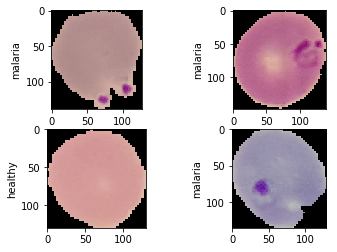

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

plt.figure(figsize=(15,15))
fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(2):
    for j in range(2):
        #Reading files after concatenating file name with folder path
        image = imread(os.path.join(base_dir,train_df["filename"][i+2*j]))
        #showing some images of the dataset
        ax[i,j].imshow(image)
        ax[i,j].set_ylabel(train_df["label"][i+2*j])

# 4. Data Preparation

1. since we have textual labels for our images i.e. Parasitized/Uninfected so we will convert them to numerical labels i.e. 0/1

In [ ]:
from sklearn import preprocessing

#create the LabelEncoder object
le = preprocessing.LabelEncoder()

# Fit label Encoder
le.fit(train_df['label'])

#transform textual labels
labels = le.transform(train_df['label'])

print('0 - ',le.inverse_transform([0]))
print('1 - ',le.inverse_transform([1]))

0 -  ['healthy']
1 -  ['malaria']


2. Here we split the dataset into training and validation sets.
Training set is the subset of the dataset that is used for training and validation set is used to evaluate the performance of the model after every epoch.

In [ ]:
#import required functions
from sklearn.model_selection import train_test_split

#divide the dataset into training and validation sets
train_files, val_files, train_labels, val_labels = train_test_split(train_df['filename'],
                                                                    labels, 
                                                                    test_size=0.2, random_state=42,shuffle=True)
#check the shapes of training and validation sets
print(train_files.shape, val_files.shape)
print(train_labels.shape,val_labels.shape)

(15432,) (3858,)
(15432,) (3858,)


In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
shapes = []
for i in train_df['filename']:
    image = imread(os.path.join(base_dir,i))
    shapes.append(image.shape)

print('Minimum Dimensions - ',np.min(shapes,axis=0))
print('Maximum Dimensions - ',np.max(shapes,axis=0))
print('Average Dimensions - ',np.mean(shapes,axis=0))

Minimum Dimensions -  [40 49  3]
Maximum Dimensions -  [385 364   3]
Average Dimensions -  [132.9600311  132.58335925   3.        ]


We can see that there are images of different shapes. It is recommended to have images in shape size before going ahead with modeling process and it is also dependent on which feature extractor tool, you are using. 

# 5. Method 1: Pixel Values as Features

Here, we will use pixel value as a feature to classify images in Parasitized/Uninfected images. Although, we have looked at that these images are of different shapes so we will bring all the images in same shape by resizing to 40X40. And, after that convert two dimensional matrix to one dimensional vector. So, for each images, we will have 1600 (40X40) features.

In [ ]:
IMG_DIMS=(40,40)
train_features_pixel=[]

for i in train_files:
    image = imread(os.path.join(base_dir,i))
    image = resize(image,IMG_DIMS)
    features = np.reshape(image,(IMG_DIMS[0]*IMG_DIMS[1]*3)) 
    train_features_pixel.append(features)

train_features_pixel = np.array(train_features_pixel)

In [ ]:
train_features_pixel.shape

(15432, 4800)

In [ ]:
IMG_DIMS=(40,40)
val_features_pixel=[]

for i in val_files:
    image = imread(os.path.join(base_dir,i))
    image = resize(image,IMG_DIMS)
    features = np.reshape(image,(IMG_DIMS[0]*IMG_DIMS[1]*3))
    val_features_pixel.append(features)

val_features_pixel = np.array(val_features_pixel)

In [ ]:
val_features_pixel.shape

(3858, 4800)

# 6. Model1: Model building using Pixel Features

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#training the Logistic model
clf_lr_pixel = LogisticRegression()
clf_lr_pixel.fit(train_features_pixel,train_labels)

C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preditions_train = clf_lr_pixel.predict(train_features_pixel)
print("Training: Model Accuracy - ",accuracy_score(train_labels,preditions_train)*100,'%')

predictions_val = clf_lr_pixel.predict(val_features_pixel)
print("Validation: Model Accuracy - ",accuracy_score(predictions_val,val_labels)*100,'%')

Training: Model Accuracy -  72.73198548470711 %
Validation: Model Accuracy -  67.00362882322447 %


## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

#training the Logistic model
clf_svc_pixel = LinearSVC(random_state=102)
clf_svc_pixel.fit(train_features_pixel,train_labels)

C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=102, tol=0.0001,
          verbose=0)

In [ ]:
preditions_train = clf_svc_pixel.predict(train_features_pixel)
print("Training: Model Accuracy - ",accuracy_score(train_labels,preditions_train)*100,'%')

predictions_val = clf_svc_pixel.predict(val_features_pixel)
print("Validation: Model Accuracy - ",accuracy_score(predictions_val,val_labels)*100,'%')

Training: Model Accuracy -  76.32840850181441 %
Validation: Model Accuracy -  65.68170036288232 %


# 7. Method 2: HOG Features

Your image size should be in 64X128(Width X Height) shape to extract HOG features from images. We will first change image shape size to 64X128 first and then extract HOG features.

In [ ]:
from skimage.feature import hog

In [ ]:
#Showing example of one image first
index= np.random.randint(0,1000)

image = imread(os.path.join(base_dir,train_files.iloc[index]))
IMG_DIMS = (128,64) # SkIMAGE takes input in HEIGHT X WIDTH format
image1 = resize(image,IMG_DIMS)
#calculating HOG features
features, hog_image = hog(image1, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


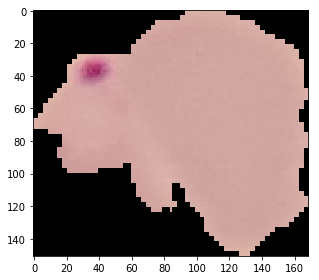

In [ ]:
#Original Image
imshow(image)

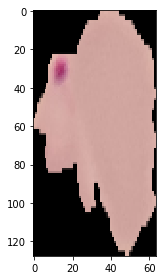

In [ ]:
#After Resize
imshow(image1)

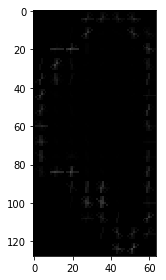

In [ ]:
#Image with HOG Image (Look At the Edges)
imshow(hog_image)

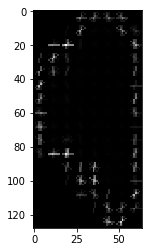

In [ ]:
#Highlighting the HOG image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(hog_image, cmap="gray")

In [ ]:
#Shape of HOG Feature Vector
features.shape

(3780,)

## Calculate HOG features for both training and Validation images

In [ ]:
IMG_DIMS = (128,64)

#For Training Images

train_features_hog = []
for i in train_files:
    image = imread(os.path.join(base_dir,i))
    image = resize(image,IMG_DIMS)
    #calculating HOG features
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features = np.reshape(features,(features.shape[0]))
    train_features_hog.append(hog_features)

train_features_hog = np.array(train_features_hog)
  
#For Validation Images

val_features_hog = []
for i in val_files:
    image = imread(os.path.join(base_dir,i))
    image = resize(image,IMG_DIMS)
    #calculating HOG features
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features = np.reshape(features,(features.shape[0]))
    val_features_hog.append(hog_features)

val_features_hog = np.array(val_features_hog)

#checking the shape of the final lists after reading all the images
train_features_hog.shape, val_features_hog.shape

((15432, 3780), (3858, 3780))

# 8. Model2: Model building using HOG Features

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#training the Logistic model
clf_lr_hog = LogisticRegression()
clf_lr_hog.fit(train_features_hog,train_labels)

C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preditions_train = clf_lr_hog.predict(train_features_hog)
print("Training: Model Accuracy - ",accuracy_score(train_labels,preditions_train)*100,'%')

predictions_val = clf_lr_hog.predict(val_features_hog)
print("Validation: Model Accuracy - ",accuracy_score(predictions_val,val_labels)*100,'%')

Training: Model Accuracy -  83.2814930015552 %
Validation: Model Accuracy -  79.4971487817522 %


## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

#training the Logistic model
clf_svc_hog = LinearSVC()
clf_svc_hog.fit(train_features_hog,train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
preditions_train = clf_svc_hog.predict(train_features_hog)
print("Training: Model Accuracy - ",accuracy_score(train_labels,preditions_train)*100,'%')

predictions_val = clf_svc_hog.predict(val_features_hog)
print("Validation: Model Accuracy - ",accuracy_score(predictions_val,val_labels)*100,'%')

Training: Model Accuracy -  92.6905132192846 %
Validation: Model Accuracy -  81.00051840331778 %


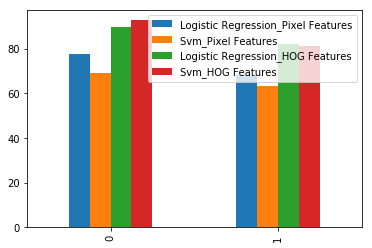

In [ ]:
import pandas as pd
results_df = pd.DataFrame({'Logistic Regression_Pixel Features':[77.41057542768274,68.27371695178849], 'Svm_Pixel Features': [69.0772420943494 ,63.089683773976155], 'Logistic Regression_HOG Features':[89.83929497148782, 82.19284603421461],  'Svm_HOG Features': [92.6905132192846,81.00051840331778]})
results_df.plot(y=["Logistic Regression_Pixel Features", "Svm_Pixel Features", "Logistic Regression_HOG Features","Svm_HOG Features"], kind="bar")


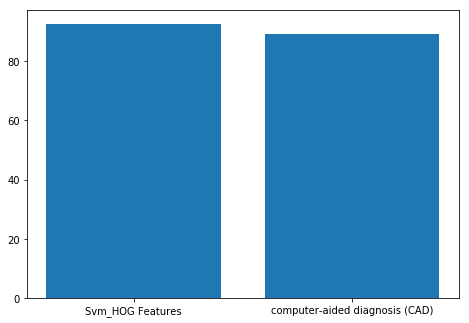

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l = ['Svm_HOG Features', 'computer-aided diagnosis (CAD)']
s = [92.6905132192846 ,89.10]
ax.bar(l,s)
plt.show()

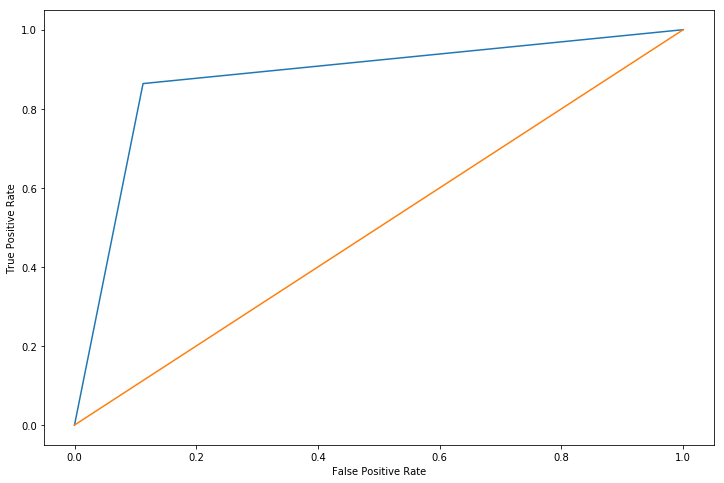

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(train_labels, preditions_train) 
auc = roc_auc_score(train_labels, preditions_train) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
#plt.legend(loc=4) 
plt.show()